**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

READING THE TRAIN DATASET

In [2]:
df = pd.read_csv('Housing_dataset_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


CHECKING FOR NULL VALUES

In [4]:
df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

REMOVING THE NULL VALUES

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

***EXPLORATION DATA ANALYSIS***



<Axes: xlabel='title', ylabel='count'>

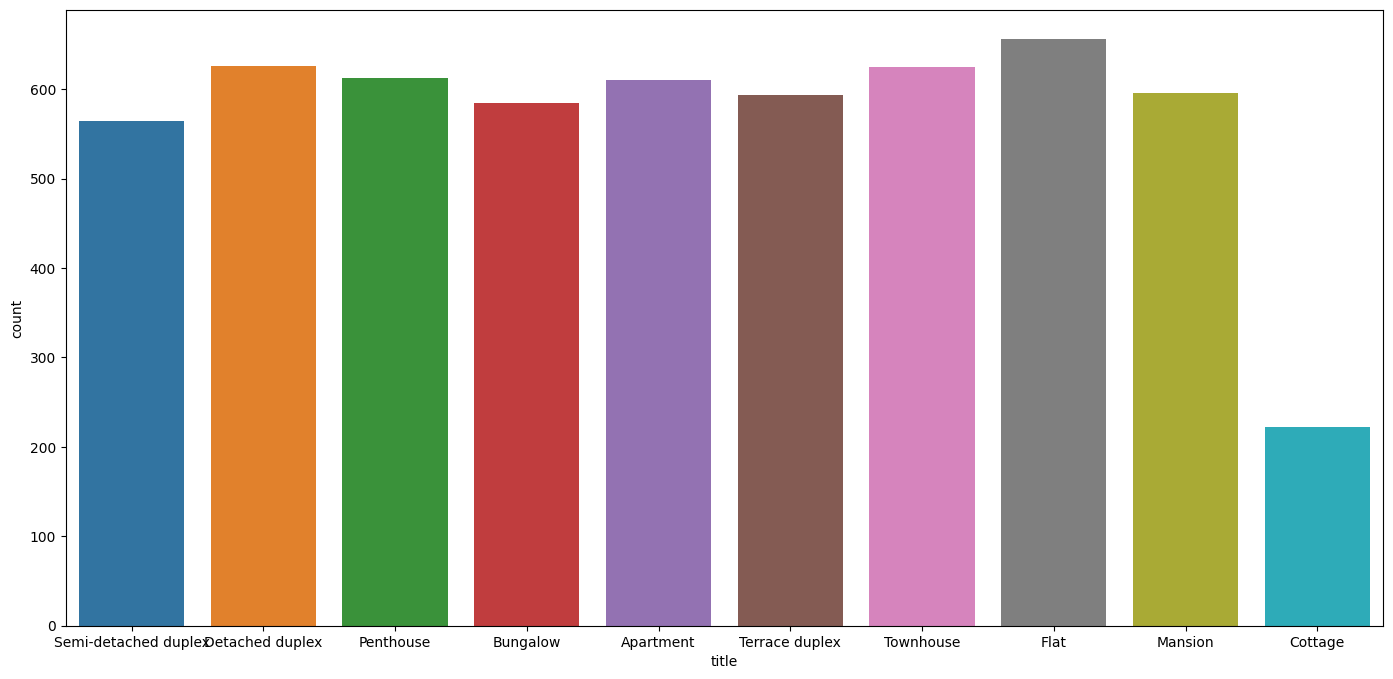

In [7]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x=df['title'])

<Axes: xlabel='count', ylabel='loc'>

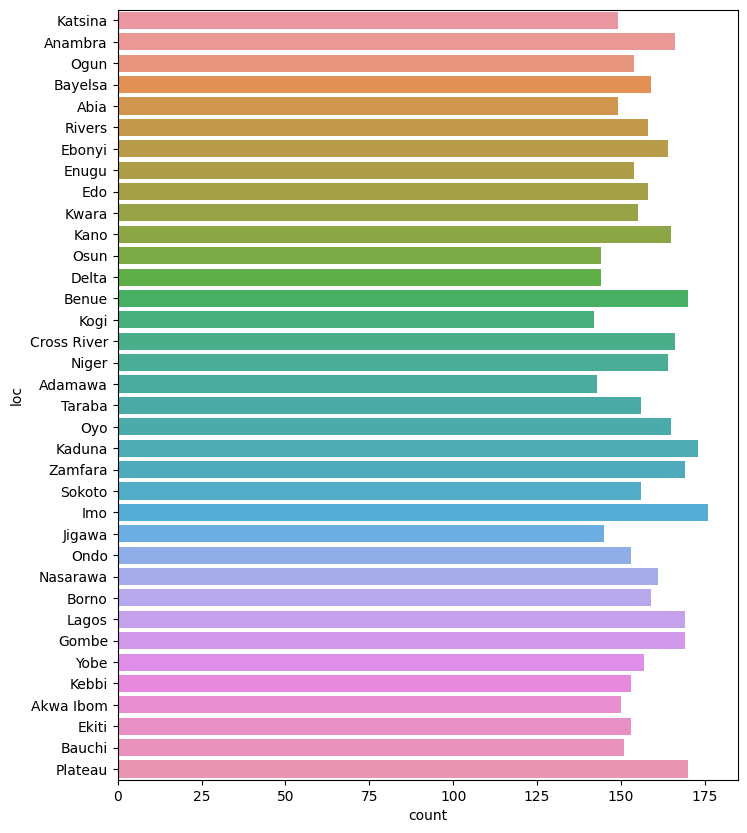

In [8]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y=df['loc'])

<Axes: xlabel='price', ylabel='loc'>

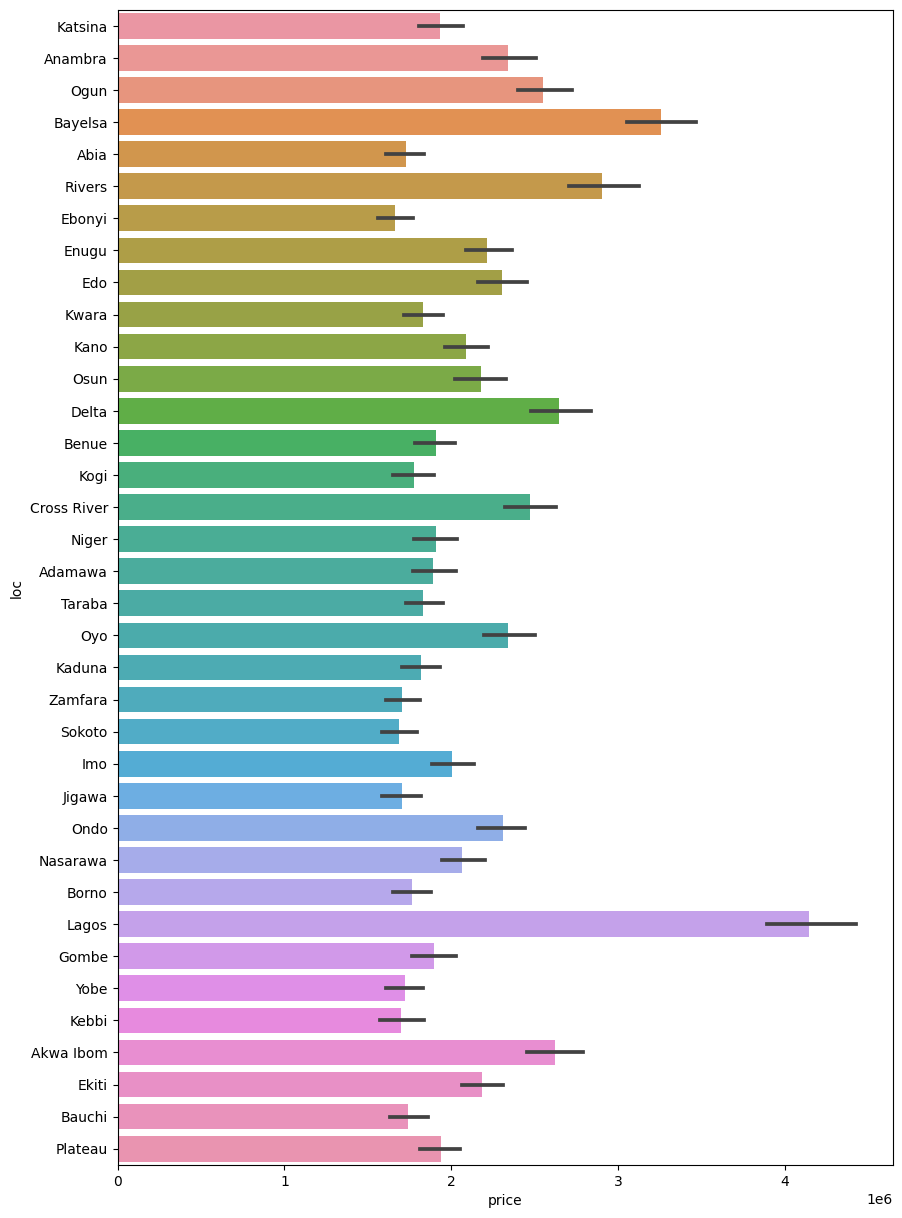

In [9]:
plt.figure(figsize=(10,15))

sns.barplot(data=df, x=df['price'], y=df['loc'])

<Axes: xlabel='bedroom', ylabel='price'>

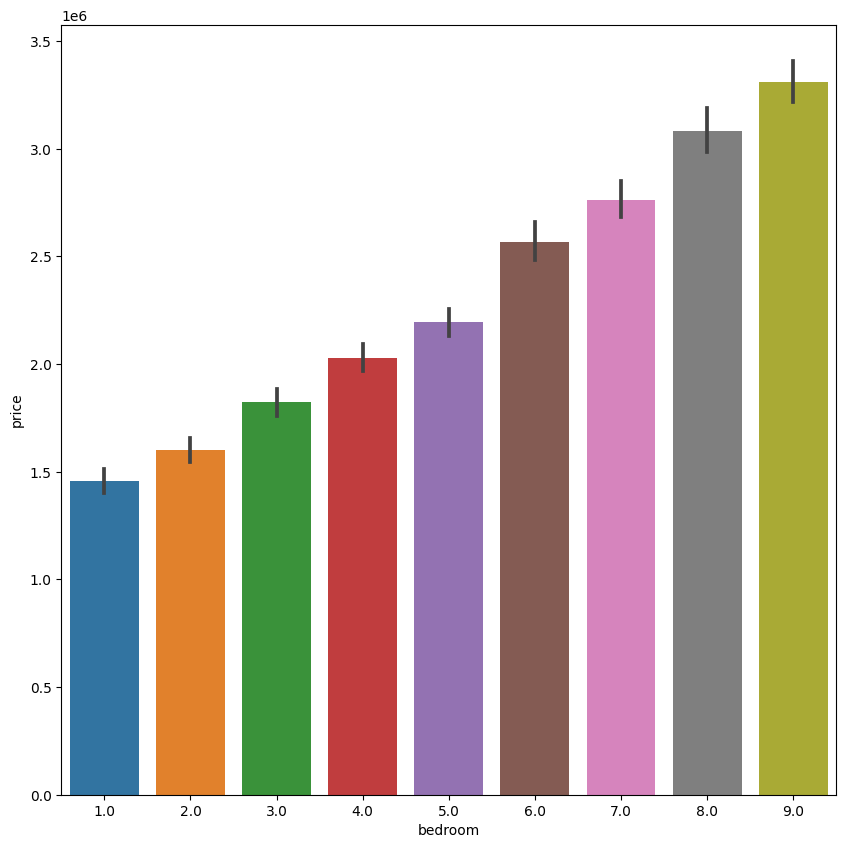

In [10]:
plt.figure(figsize=(10,10))

sns.barplot(data=df, x=df['bedroom'], y=df['price'])

<Axes: xlabel='bathroom', ylabel='title'>

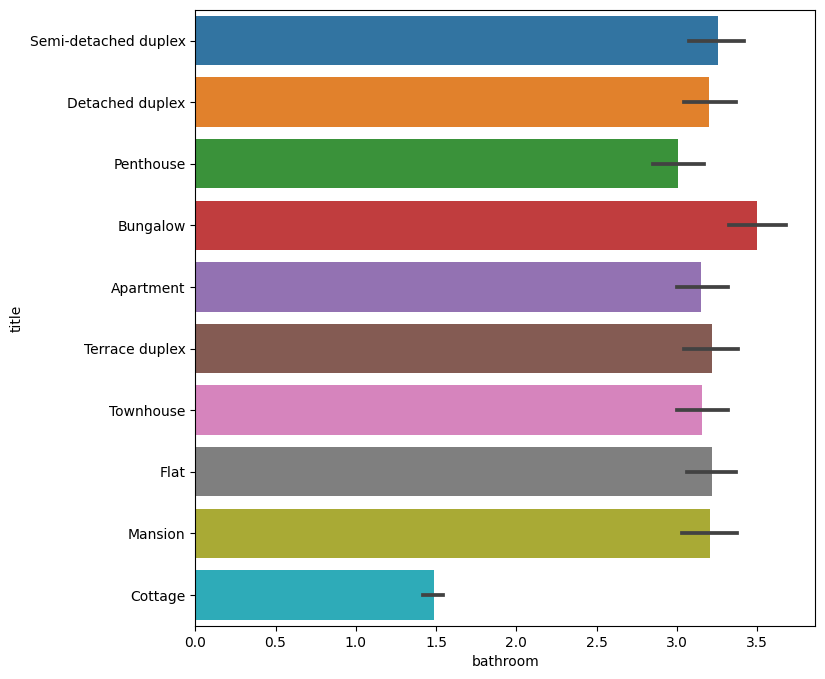

In [11]:
plt.figure(figsize=(8,8))

sns.barplot(data=df, y=df['title'], x=df['bathroom'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1500 with 0 Axes>

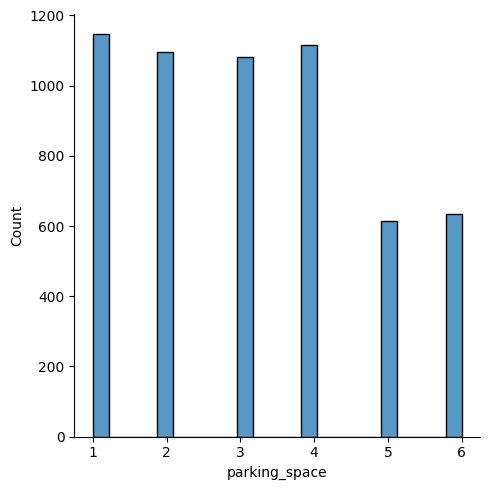

In [12]:
plt.figure(figsize=(10,15))

sns.displot(data=df, x=df['parking_space'], )

<Axes: ylabel='price'>

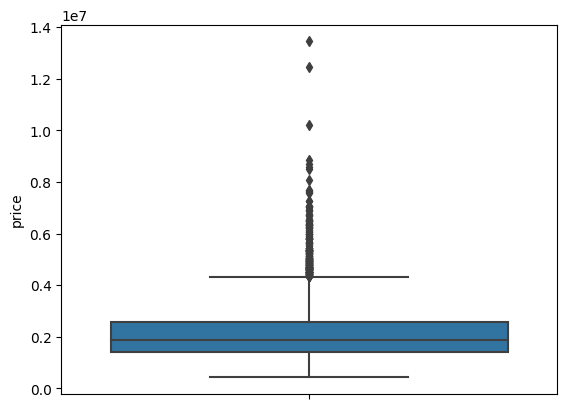

In [13]:
sns.boxplot(data=df, y=df['price'])

<Axes: xlabel='price', ylabel='title'>

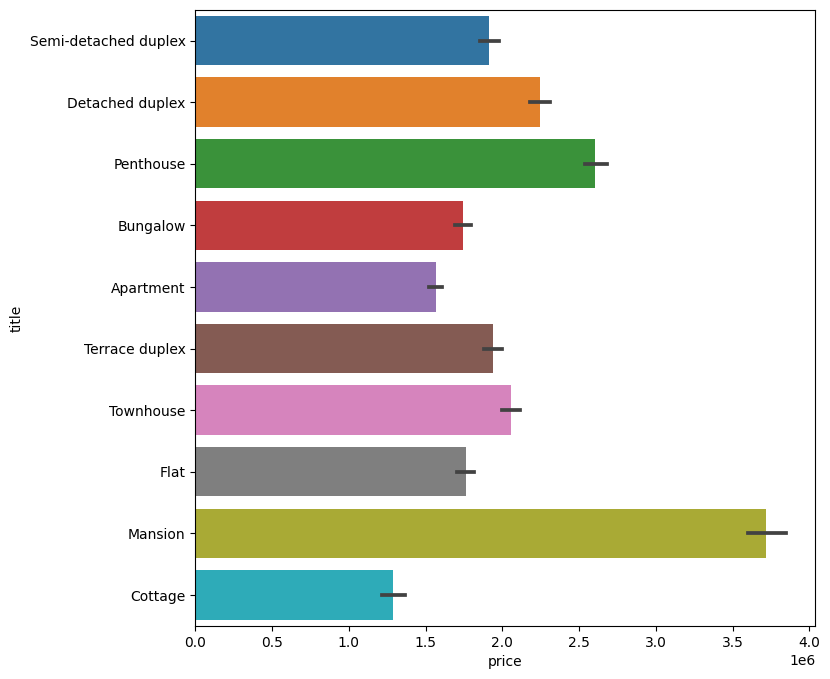

In [14]:
plt.figure(figsize=(8,8))

sns.barplot(data=df, y=df['title'], x=df['price'])

<Axes: xlabel='bedroom', ylabel='title'>

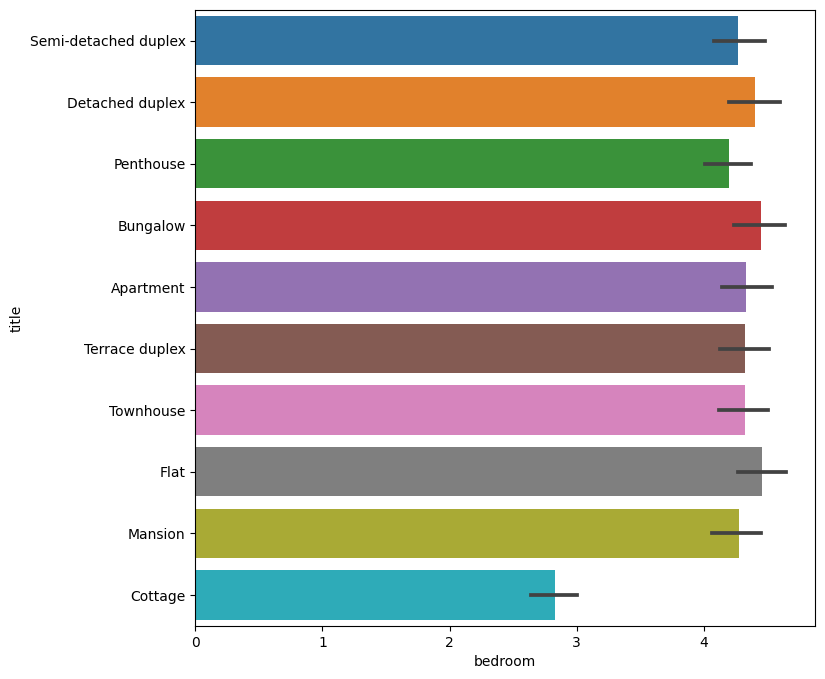

In [15]:
plt.figure(figsize=(8,8))

sns.barplot(data=df, x=df['bedroom'], y=df['title'])

In [16]:
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
10,12573,Ogun,Bungalow,1.0,2.0,6.0,1330213.036
11,2624,Bayelsa,Apartment,3.0,4.0,2.0,1891772.069
...,...,...,...,...,...,...,...
13989,10107,Kebbi,Terrace duplex,4.0,7.0,2.0,1581061.171
13990,7174,Kebbi,Penthouse,8.0,7.0,3.0,3086400.032
13992,3423,Ogun,Cottage,1.0,2.0,2.0,1508351.845
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086


In [17]:
x = df.drop(['ID', 'price'], axis=1)
y = df['price']
x

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
7,3003,Katsina,Penthouse,3.0,3.0,5.0
10,12573,Ogun,Bungalow,1.0,2.0,6.0
11,2624,Bayelsa,Apartment,3.0,4.0,2.0
...,...,...,...,...,...,...
13989,10107,Kebbi,Terrace duplex,4.0,7.0,2.0
13990,7174,Kebbi,Penthouse,8.0,7.0,3.0
13992,3423,Ogun,Cottage,1.0,2.0,2.0
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0


In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
min_max_scaler = MinMaxScaler()
label = LabelEncoder()
x['loc'] = label.fit_transform(x['loc'])
x['title'] = label.fit_transform(x['title'])
x

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,19,7,2.0,2.0,1.0
3,2224,3,3,5.0,2.0,4.0
7,3003,19,6,3.0,3.0,5.0
10,12573,26,1,1.0,2.0,6.0
11,2624,5,0,3.0,4.0,2.0
...,...,...,...,...,...,...
13989,10107,20,8,4.0,7.0,2.0
13990,7174,20,6,8.0,7.0,3.0
13992,3423,26,2,1.0,2.0,2.0
13994,10477,33,3,8.0,1.0,6.0


SPLITING OF THE TRAIN DATASET 

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

USING OF MODEL TO TRAIN THE TRAIN DATA , TO GET THE BEST MODEL FOR YOUR MODELLING

In [21]:
# from lightgbm import LGBMRegressor
lasso, linear, ridge, dtr , rfr, svr, gbr , gnb, cat, xgb= Lasso(),LinearRegression(),  Ridge(), DecisionTreeRegressor(),RandomForestRegressor(), SVR(), GradientBoostingRegressor(),GaussianNB(),CatBoostRegressor(),XGBRegressor()
model = [lasso, linear,  ridge, dtr,rfr , svr, gbr, cat, xgb]
score = []
for model in model:
    model.fit(x_train, y_train)
    scores = model.score(x_test, y_test)
    score.append({
        'model' : model,
        'score' : scores
    })
score

Learning rate set to 0.050933
0:	learn: 1011706.9276026	total: 59.4ms	remaining: 59.3s
1:	learn: 982697.7702479	total: 60.8ms	remaining: 30.4s
2:	learn: 958148.0536455	total: 61.8ms	remaining: 20.5s
3:	learn: 934670.8481076	total: 62.8ms	remaining: 15.6s
4:	learn: 912948.9862250	total: 63.7ms	remaining: 12.7s
5:	learn: 893365.8661619	total: 64.7ms	remaining: 10.7s
6:	learn: 873202.5633670	total: 65.6ms	remaining: 9.31s
7:	learn: 853549.7730515	total: 66.6ms	remaining: 8.26s
8:	learn: 836734.0556517	total: 68.2ms	remaining: 7.51s
9:	learn: 820569.9586474	total: 69.2ms	remaining: 6.85s
10:	learn: 810976.6854200	total: 70.2ms	remaining: 6.31s
11:	learn: 797129.6074114	total: 71.1ms	remaining: 5.86s
12:	learn: 783311.2040854	total: 72.1ms	remaining: 5.47s
13:	learn: 770020.6287565	total: 73ms	remaining: 5.14s
14:	learn: 757133.9001264	total: 73.9ms	remaining: 4.85s
15:	learn: 746056.7798213	total: 74.8ms	remaining: 4.6s
16:	learn: 736216.7109486	total: 75.8ms	remaining: 4.38s
17:	learn: 72

[{'model': Lasso(), 'score': 0.2893492722729344},
 {'model': LinearRegression(), 'score': 0.28934925560975844},
 {'model': Ridge(), 'score': 0.2893488289689732},
 {'model': DecisionTreeRegressor(), 'score': 0.5320737825335966},
 {'model': RandomForestRegressor(), 'score': 0.7127117186284794},
 {'model': SVR(), 'score': -0.03857225329474834},
 {'model': GradientBoostingRegressor(), 'score': 0.7967068990390772},
 {'model': <catboost.core.CatBoostRegressor at 0x12b92fd50>,
  'score': 0.8658936639224383},
 {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot

WITH THE RESULT ABOVE , CATBOOST HAS THE HIGHEST ACCURACY SCORE

LOADING OF THE TEST DATASET, AND PROCESSING OF THE DATA 

In [22]:
data_test = pd.read_csv('Housing_dataset_test.csv')
data_test['loc'] = label.fit_transform(data_test['loc'])
data_test['title'] = label.fit_transform(data_test['title'])
test_x = data_test.drop('ID', axis=1)

In [23]:
# Initializing variables
scores = []
test_oof = []

# Creating 5-fold cross-validation object
kf = KFold(n_splits=5)

# Looping over each fold
for train, test in kf.split(X = x,y=y):
    # Creating and fitting CatBoostRegressor regressor with specified parameters
    cat = CatBoostRegressor()
    cat.fit(x.iloc[train], y.iloc[train])
   
    # Calculating RMSE on test set
    rmse = mean_squared_error(y.iloc[test], cat.predict(x.iloc[test]), squared=False)
   
    # Predicting values on test data
    predictions = cat.predict(test_x)
   
    # Appending scores and predictions to lists
    test_oof.append(predictions)
    scores.append(rmse)
   
    # Printing RMSE for each fold
    print(rmse)

# Printing average score across all folds
print("Average score in 5-fold CV:", np.mean(scores))

Learning rate set to 0.052019
0:	learn: 1021356.1584974	total: 4.49ms	remaining: 4.48s
1:	learn: 991331.9653093	total: 8.24ms	remaining: 4.11s
2:	learn: 966645.5042393	total: 9.3ms	remaining: 3.09s
3:	learn: 940755.4410766	total: 10.7ms	remaining: 2.67s
4:	learn: 918353.5824167	total: 13.7ms	remaining: 2.73s
5:	learn: 897979.6009835	total: 15.1ms	remaining: 2.5s
6:	learn: 876978.2032623	total: 16.5ms	remaining: 2.33s
7:	learn: 857240.4981186	total: 18ms	remaining: 2.23s
8:	learn: 839876.0303469	total: 23ms	remaining: 2.53s
9:	learn: 823247.2720833	total: 25.1ms	remaining: 2.48s
10:	learn: 811133.5183864	total: 26.9ms	remaining: 2.42s
11:	learn: 797176.1845884	total: 28.8ms	remaining: 2.37s
12:	learn: 783091.6916586	total: 30.5ms	remaining: 2.32s
13:	learn: 769455.3936618	total: 35.7ms	remaining: 2.51s
14:	learn: 756477.9141922	total: 37.4ms	remaining: 2.45s
15:	learn: 746177.6360145	total: 39ms	remaining: 2.4s
16:	learn: 735421.7854324	total: 40.5ms	remaining: 2.34s
17:	learn: 725398.0